In [2]:
%pip install geopandas contextily shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 KB 5.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 KB 5.0 MB/s eta 0:00:00
You should consider upgrading via the '/home/daniel/repositories/external/pyenv/versions/sandbox/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


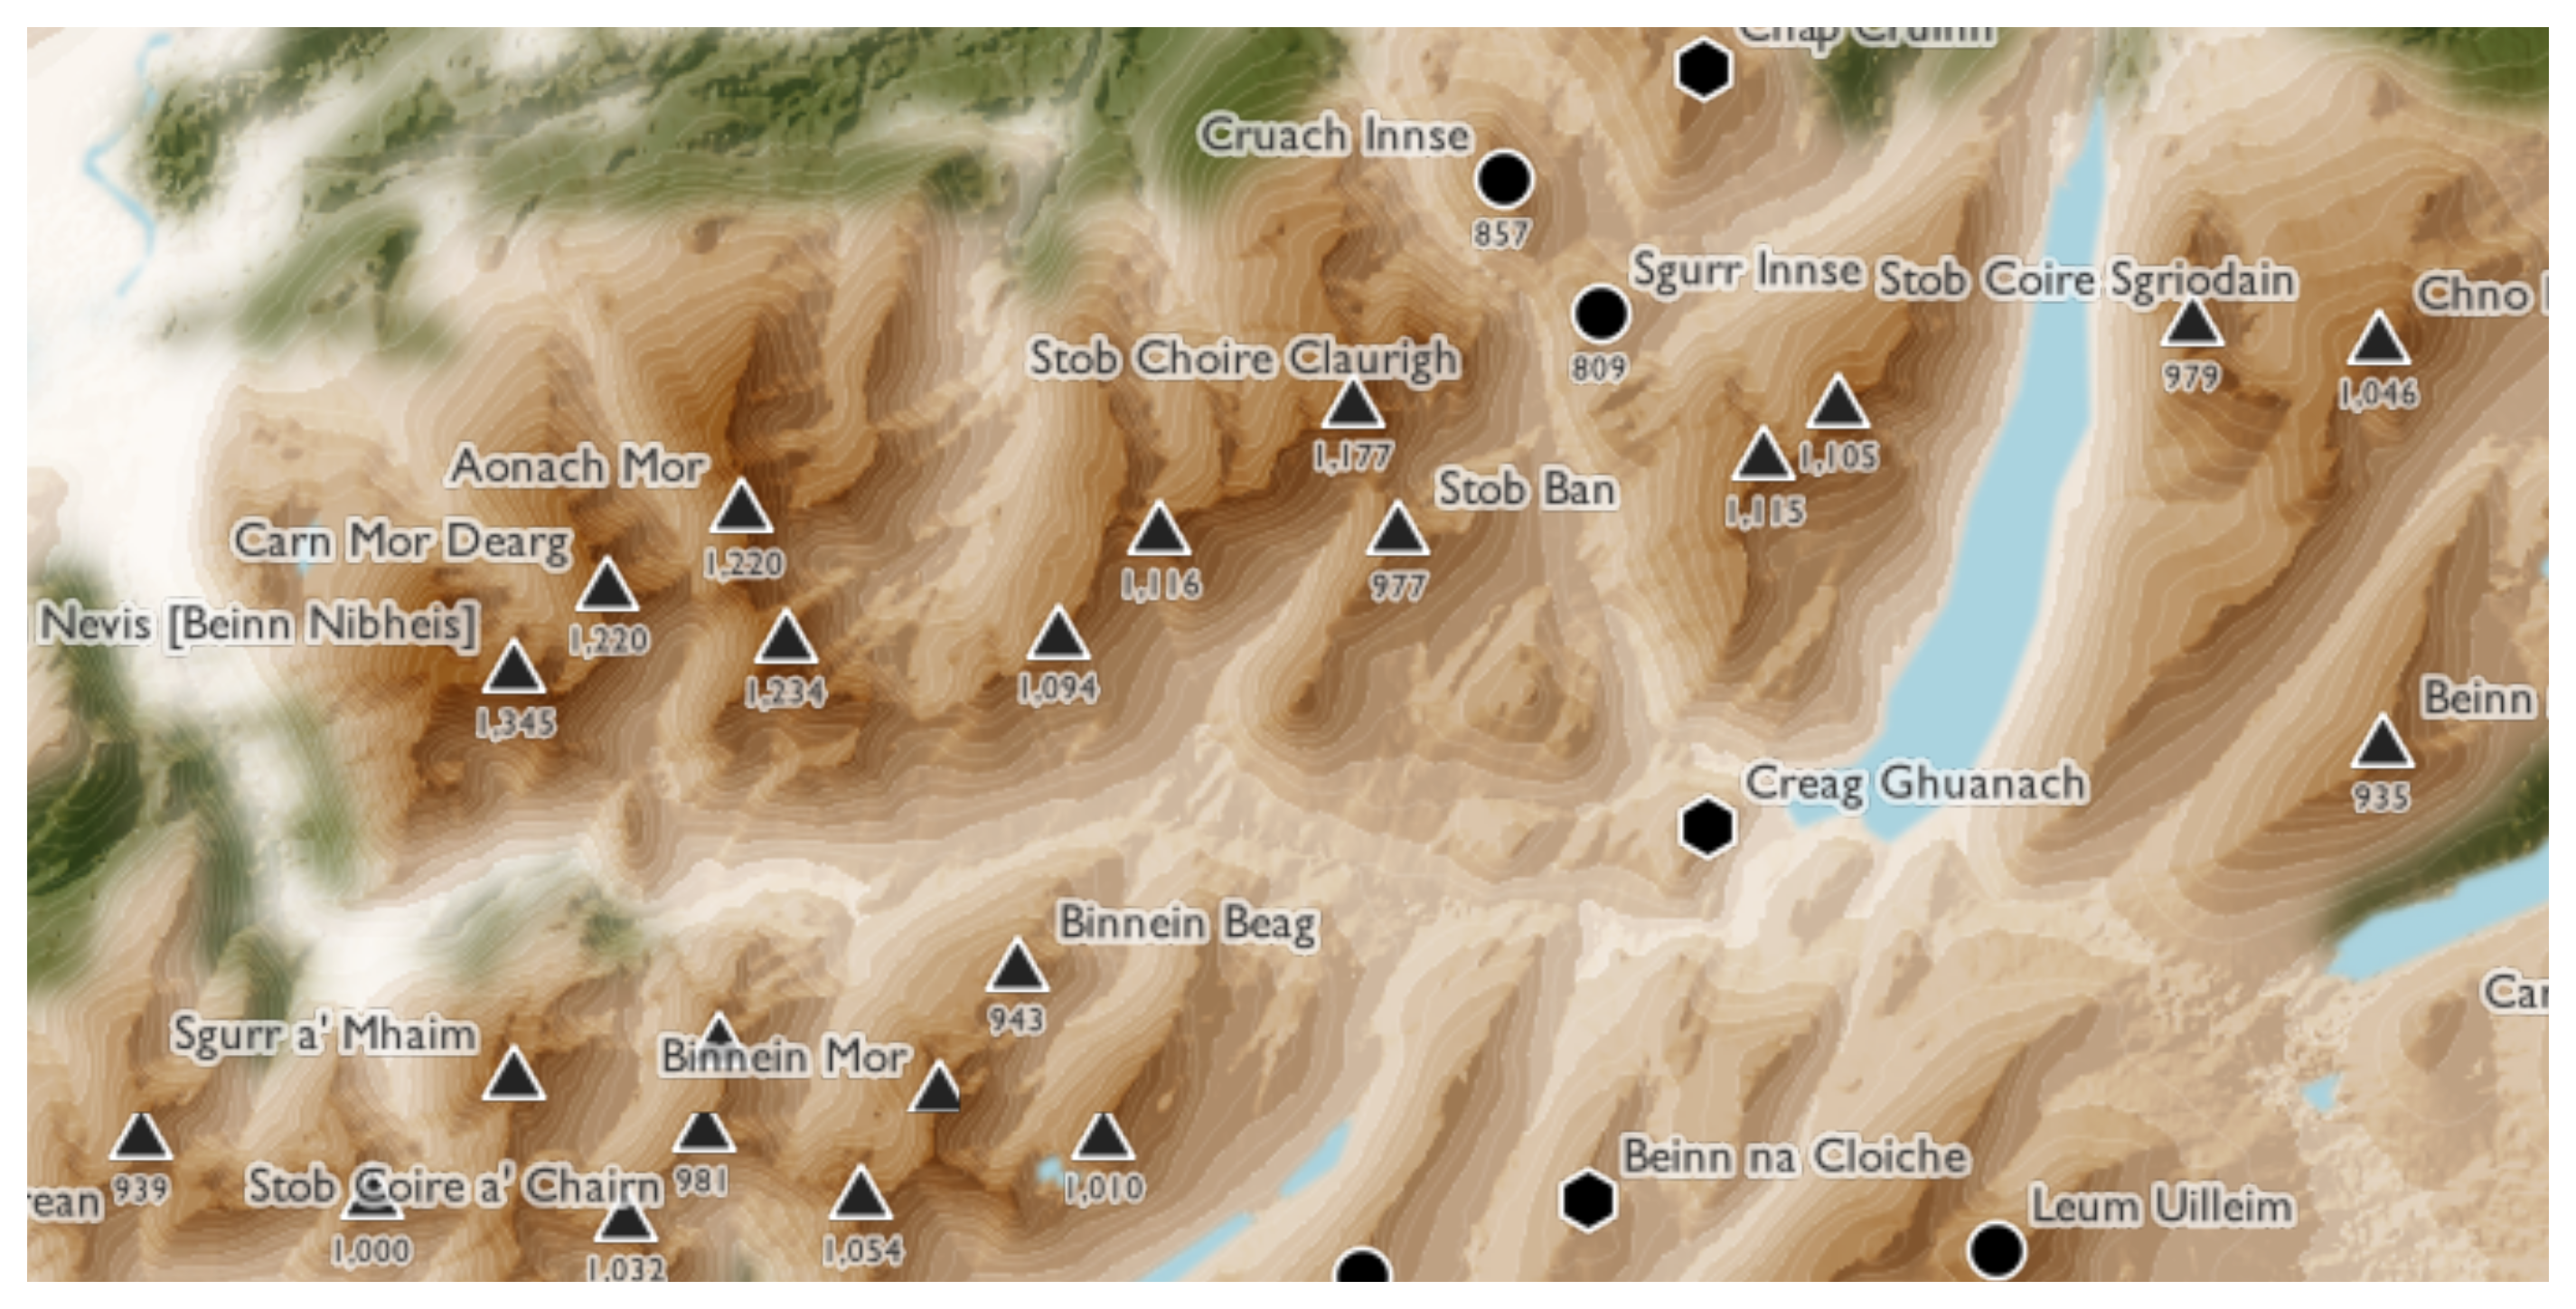

In [10]:
import gpxpy
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import LineString, Point

# Parse GPX
with open('ramsay.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

# Extract data
coords = []
elevations = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            coords.append((point.longitude, point.latitude))
            elevations.append(point.elevation)

# Create map
line = LineString(coords)
gdf = gpd.GeoDataFrame([1], geometry=[line], crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

# Create figure with subplots
fig, ax = plt.subplots(1, 1, figsize=(12, 10), dpi=300)

# Plot map
gdf.plot(ax=ax, color='red', linewidth=0)
ctx.add_basemap(ax, source='https://tiles.daniel-williams.co.uk/topology/v0/{z}/{x}/{y}.png')
ctx.add_basemap(
    ax,
    source='https://tiles.daniel-williams.co.uk/dbobih/v0/{z}/{x}/{y}.png',
    alpha=1.0 
)
ax.axis('off')
fig.savefig('ramsay_round_basemap.png', dpi=300, bbox_inches='tight')

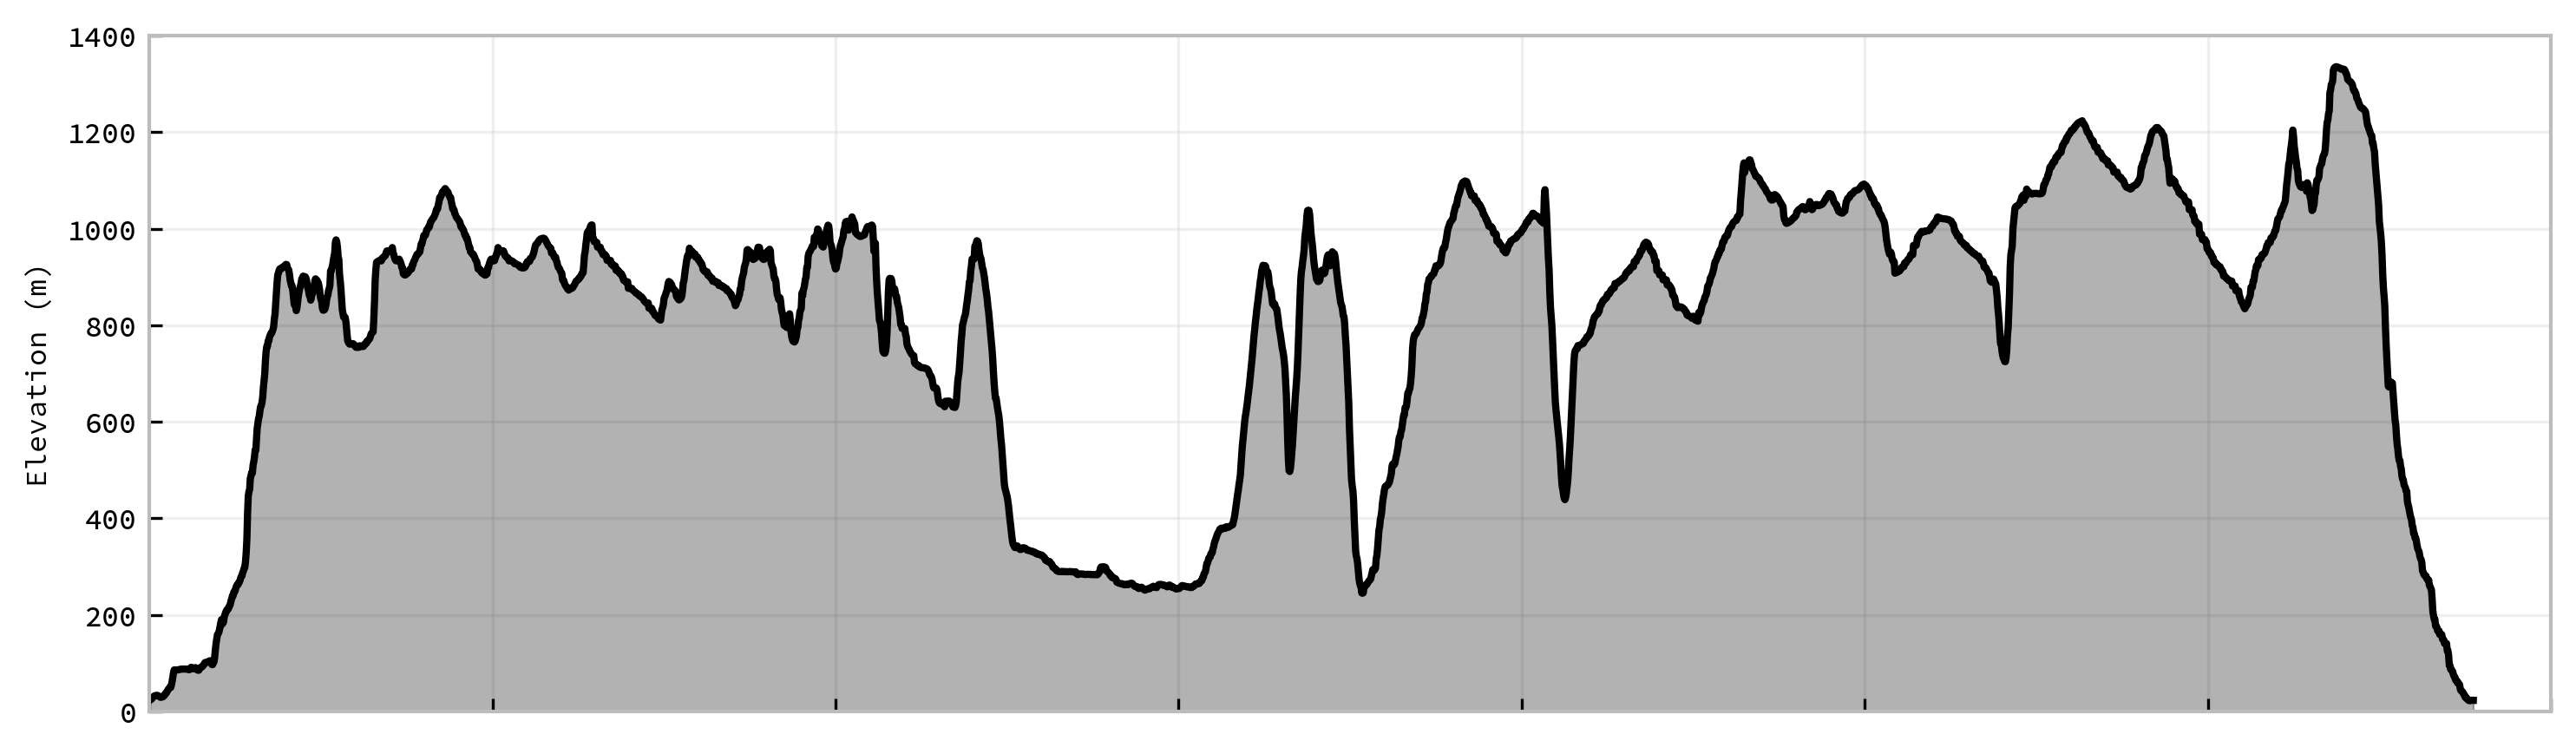

In [18]:
f, ax = plt.subplots(1,1, figsize=(10, 3), dpi=300)
# Plot elevation profile
ax.plot(elevations, color='black', linewidth=2)
ax.fill_between(range(len(elevations)), elevations, alpha=0.3, color="black")
#ax.set_xlabel('Distance')
ax.set(xlabel=None)
ax.set_xticklabels([])
ax.set_ylabel('Elevation (m)')
ax.grid(True, alpha=0.3)
ax.set_xlim([0,3500])
ax.set_ylim([0,1400])
plt.tight_layout()
#plt.savefig('gpx_complete.png', dpi=300, bbox_inches='tight')
plt.show()


In [19]:
import pandas

In [20]:
url = "https://www.ramsaysround.co.uk/completions" 

In [21]:
%pip install html5lib

You should consider upgrading via the '/home/daniel/repositories/external/pyenv/versions/sandbox/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [22]:
raw = """
| No. | Date | Name | Time | Dir | Notes |
| --- | --- | --- | --- | --- | --- |
| 1 | 08 07 78 | Charlie Ramsay | 23:58 | AC |  |
| 2 | 25 06 87 | Martin Stone | 23:24 | C |  |
| 3 | 27 07 87 | Jonathon Broxap | 21:24 | C |  |
| 4 | 15 07 89 | Helene Diamantides | 20:24 | C |  |
| 5 | 15 07 89 | Mark Rigby | 20:24 | C |  |
| 6 | 02 08 89 | Adrian Belton | 18:23 | AC |  |
| 7 | 27 05 90 | Bob Berzins | 21:55 | C |  |
| 8 | 11 06 90 | Pete Simpson | 23:26 | C |  |
| 9 | 02 06 90 | Martin Moran | 23:38 | AC |  |
| 10 | 13 07 90 | Mike Hartley | 21:14 | AC |  |
| 11 | 06 06 92 | Keith Adams | 23:52 | C |  |
| 12 | 16 07 94 | Alex Keith | 23:50 | C | * |
| 13 | 05 05 95 | Colin Donnelly | 21:06 | AC |  |
| 14 | 22 07 95 | Brian Clough | 23:33 | C |  |
| 15 | 15 06 96 | Paul Mc Clintock | 23:57 | C |  |
| 16 | 15 06 96 | Mark Hartel | 23:24 | AC |  |
| 17 | 15 05 97 | Phil Clark | 20:45 | C |  |
| 18 | 23 05 98 | Richard Calder | 22:37 | C |  |
| 19 | 23 05 98 | Geoff Pettengall | 23:25 | C |  |
| 20 | 23 05 98 | Craig Harwood | 23:56 | C |  |
| 21 | 24 05 98 | Trevor Dibben | 22:58 | C |  |
| 22 | 24 05 98 | Nigel Wigley | 22:58 | C |  |
| 23 | 04 07 98 | Robbie Cant | 23:07 | AC |  |
| 24 | 18 07 98 | Adrian Davis | 20:30 | C |  |
| 25 | 20 05 00 | Allan Miller | 23:30 | C |  |
| 26 | 22 07 00 | Jane Meeks | 23:59 | C |  |
| 27 | 02 06 02 | Ian Lancaster | 23:59 | C |  |
| 28 | 03 06 02 | Chris Rhodes | 22:59 | C |  |
| 29 | 22 06 02 | Yiannis Tridimas | 23:53 | C |  |
| 30 | 02 08 02 | Carl Pryce | 22:51 | C | * |
| 31 | 05 07 03 | John Fleetwood | 23:53 | AC |  |
| 32 | 21 05 05 | Gavin Williams | 23:28 | C |  |
| 33 | 21 05 05 | Tom Westgate | 23:46 | C |  |
| 34 | 25 06 05 | Mick James | 23:30 | C | * |
| 35 | 25 06 05 | Nick Wallis | 23:40 | C |  |
| 36 | 25 06 05 | Olly Stephenson | 23:41 | C |  |
| 37 | 25 06 05 | Jamie Thin | 23:31 | C | * |
| 38 | 25 06 05 | Graham Ackland | 23:58 | C | * |
| 39 | 25 06 05 | Martin White | 23:46 | C |  |
| 40 | 16 07 05 | Kev Saville | 23:44 | C |  |
| 41 | 03 06 06 | Steve Pyke | 22:15 | C |  |
| 42 | 03 06 06 | Tim Laney | 22:15 | C |  |
| 43 | 19 06 06 | Steve Birkinshaw | 21:02 | C |  |
| 44 | 14 07 07 | Gavin Thomas | 23:30 | C |  |
| 45 | 17 05 08 | Nicky Spinks | 22:32 | C |  |
| 46 | 17 05 08 | Rob Woodall | 22:38 | C |  |
| 47 | 24 05 08 | Digby Harris | 21:35 | C |  |
| 48 | 13 06 08 | Jason Hubert | 22:18 | C |  |
| 49 | 13 06 08 | Willie Gibson | 22:18 | C |  |
| 50 | 12 07 08 | Fran Williams | 23:15 | C | * |
| 51 | 12 07 08 | Neil Speight | 23:15 | C | * |
| 52 | 13 09 08 | Jon Chapman | 22:37 | C |  |
| 53 | 29 05 09 | Chris Near | 20:30 | C |  |
| 54 | 06 06 09 | Alan Lucker | 23:27 | C |  |
| 55 | 06 06 09 | William Houghton | 23:35 | C |  |
| 56 | 22 07 10 | Bruce Poll | 22:47 | AC |  |
| 57 | 22 07 10 | Alan Smith | 22:47 | AC |  |
| 58 | 24 07 10 | Jon Gay | 23:07 | AC |  |
| 59 | 24 07 10 | Peter Duggan | 23:50 | AC |  |
| 60 | 24 08 10 | Mark Higginbottom | 23:51 | C |  |
| 61 | 05 06 11 | Jo Scott | 22:43 | C |  |
| 62 | 18 06 11 | Tom Phillips | 22:52 | C |  |
| 63 | 03 07 11 | Jonathan Whilock | 22:16 | C |  |
| 64 | 03 07 11 | Bryan Carr | 23:12 | C |  |
| 65 | 03 07 11 | Simon Reed | 23:34 | C |  |
| 66 | 03 07 11 | Dan Gay | 22:41 | C |  |
| 67 | 03 07 11 | Alasdair Anthony | 22:50 | C |  |
| 68 | 03 07 11 | Alastair Hubbard | 22:57 | C |  |
| 69 | 03 07 11 | Matthew Davis | 23:12 | C |  |
| 70 | 24 02 13 | Jon Gay | 23:18 | C |  |
| 71 | 02 06 13 | Bill Williamson | 22:54 | C |  |
| 72 | 14 07 13 | Graham Nash | 23:19 | C |  |
| 73 | 17 08 13 | Chris Armour | 23:34 | C |  |
| 74 | 31 08 13 | Joe Mann | 23:53 | AC |  |
| 75 | 25 05 14 | Ed Gamble | 21:57 | C |  |
| 76 | 31 05 14 | Nicky Spinks | 19:39 | C |  |
| 77 | 23 06 14 | Lee Langdon | 22:50 | C |  |
| 78 | 23 06 14 | Jules Barrett | 22:50 | C |  |
| 79 | 02 08 14 | Jules Coleman | 23:52 | C |  |
| 80 | 06 06 15 | Jez Bragg | 18:12 | C |  |
| 81 | 28 06 15 | Cameron Burt | 21:55 | C |  |
| 82 | 05 07 15 | Jon Ascroft | 16:59 | AC |  |
| 83 | 26 07 15 | Glen Borrell | 23:31 | C |  |
| 84 | 26 07 15 | Laurence Piercy | 23:31 | C |  |
| 85 | 21 04 16 | Graham Nash | 23:29 | AC |  |
| 86 | 24 05 16 | Dave Taylor | 23:18 | C |  |
| 87 | 29 05 16 | Ben Rowley | 22:47 | C |  |
| 88 | 29 05 16 | Adnan Khan | 23:24 | C |  |
| 89 | 05 06 16 | Jim Turner | 22:40 | C |  |
| 90 | 05 06 16 | Mark Roberts | 22:40 | C |  |
| 91 | 18 06 16 | Jasmin Paris | 16:13 | AC |  |
| 92 | 18 06 16 | Joe Williams | 20:49 | C |  |
| 93 | 26 06 16 | David Kerr | 21:49 | C |  |
| 94 | 14 08 16 | John Parkin | 23:40 | C |  |
| 95 | 04 09 16 | Tim Ripper | 23:06 | AC |  |
| 96 | 03 12 16 | Donnie Campbell | 23:06 | AC |  |
| 97 | 22 01 17 | Jim Mann | 22:23 | AC |  |
| 98 | 18 05 17 | Damian Hall | 23:21 | C |  |
| 99 | 18 05 17 | Charlie Sproson | 23:21 | C |  |
| 100 | 27 05 17 | Alicia Hudelson | 23:46 | AC |  |
| 101 | 27 05 17 | Jonny Muir | 22:08 | AC |  |
| 102 | 28 05 17 | Jim Loudon | 23:10 | C |  |
| 103 | 28 05 17 | Matt Beresford | 23:10 | C |  |
| 104 | 20 06 17 | Liz Barker | 22:34 | AC |  |
| 105 | 20 06 17 | Graham Nash | 22:34 | AC |  |
| 106 | 20 06 17 | Luke Aspinall | 23:28 | C |  |
| 107 | 23 07 17 | Ross Cowie | 22:34 | AC |  |
| 108 | 23 07 17 | Tom Pape | 22:34 | AC |  |
| 109 | 02 09 17 | Dave Thompson | 23:49 | C |  |
| 110 | 13 05 18 | John Ryan | 20:52 | AC |  |
| 111 | 19 05 18 | Graham Nash | 22:32 | AC |  |
| 112 | 20 05 18 | Chris Webb | 23:21 | C |  |
| 113 | 20 05 18 | Tim Budd | 23:21 | C |  |
| 114 | 24 06 18 | Krzysztof Dołęgowski | 20:32 | C |  |
| 115 | 21 07 18 | Lucy Harding | 23:42 | AC |  |
| 116 | 21 07 18 | Erin Wilson | 23:42 | AC |  |
| 117 | 21 07 18 | Jim Russell | 23:42 | AC |  |
| 118 | 21 07 18 | David Sinclair | 23:42 | AC |  |
| 119 | 22 07 18 | Hugh Gillespie | 23:07 | C |  |
| 120 | 22 07 18 | Mark Edwards | 23:21 | C |  |
| 121 | 21 07 18 | Dominic Reid | 23:17 | C |  |
| 122 | 28 07 18 | Wilson Alexander | 22:57 | AC |  |
| 123 | 28 07 18 | Fred Summerville | 23:05 | AC |  |
| 124 | 28 07 18 | Brian Kennaugh | 23:30 | AC |  |
| 125 | 31 07 18 | Simon Wilson | 23:44 | C |  |
| 126 | 04 08 18 | Ross Christie | 23:23 | AC |  |
| 127 | 12 08 18 | Drew Cummings | 23:35 | AC |  |
| 128 | 13 08 18 | Matt Reynolds | 23:17 | C |  |
| 129 | 24 08 18 | Katy Raworth | 23:41 | AC |  |
| 130 | 24 08 18 | Brian Raworth | 23:41 | AC |  |
| 131 | 29 08 18 | Paul Duricova | 23:49 | C |  |
| 132 | 02 09 18 | Morgan Richardson | 23:10 | C |  |
| 133 | 05 09 18 | Michael Cunningham | 23:24 | C |  |
| 134 | 12 09 18 | Ryan Smith | 22:30 | AC |  |
| 135 | 27 02 19 | Graham Nash | 23:34 | AC |  |
| 136 | 05 05 19 | Charlotte Wilson | 23:10 | AC |  |
| 137 | 05 05 19 | Yuan Armstrong | 23:12 | AC |  |
| 138 | 05 05 19 | Dougal Wilson | 23:38 | AC |  |
| 139 | 26 05 19 | John Cameron | 23:38 | AC |  |
| 140 | 26 05 19 | Sheila Thompson | 23:38 | AC |  |
| 141 | 28 05 19 | Jon Robinson | 22:54 | C |  |
| 142 | 28 05 19 | Danny Reynolds | 23:31 | C |  |
| 143 | 11 06 19 | Ruaridh Williamson | 23:18 | AC |  |
| 144 | 11 06 19 | Louis Redpath | 23:18 | AC |  |
| 145 | 16 06 19 | Michael Zeidan | 23:38 | AC |  |
| 146 | 15 06 19 | Andrew Reeve | 20:35 | AC |  |
| 147 | 17 06 19 | Kenny Perryman | 23:33 | AC |  |
| 148 | 17 06 19 | Eilidh Taylor | 23:33 | AC |  |
| 149 | 23 06 19 | Francisco Javier Cabrera Valdes | 23:47 | AC |  |
| 150 | 29 06 19 | Wilson Taylor | 23:31 | C |  |
| 151 | 06 07 19 | Es Tresidder | 16:12 | AC |  |
| 152 | 07 07 19 | Richard Evans | 23:25 | C |  |
| 153 | 07 07 19 | Brian Goodyear | 23:25 | C |  |
| 154 | 07 07 19 | Claire Nance | 21:52 | AC |  |
| 155 | 15 07 19 | April Harding | 22:50 | C |  |
| 156 | 15 07 19 | Eddie Cuthbert | 22:55 | C |  |
| 157 | 16 07 19 | Wylie Richardson | 23:25 | AC |  |
| 158 | 16 07 19 | Sinead Steedman | 23:25 | AC |  |
| 159 | 20 07 19 | Donnie Stevenson | 23:05 | C |  |
| 160 | 20 07 19 | Fraser Anderson | 23:05 | C |  |
| 161 | 06 08 19 | Tom Saville | 22:10 | AC |  |
| 162 | 06 08 19 | Oli Johnson | 22:10 | AC |  |
| 163 | 06 08 19 | Lova Chechik | 22:10 | AC |  |
| 164 | 16 08 19 | Kirsten Edwards | 23:15 | C |  |
| 165 | 16 08 19 | Stevie Anderson | 23:15 | C |  |
| 166 | 18 08 19 | Adrian Johnstone | 22:50 | AC |  |
| 167 | 25 08 19 | Diana Blair | 22:50 | AC |  |
| 168 | 25 08 19 | Robbie Alexander | 22:57 | AC |  |
| 169 | 25 08 19 | Jason Innes | 23:17 | C |  |
| 170 | 22 06 19 | Jamie Aarons | 23:51 | C |  |
| 171 | 09 07 20 | Oscar McKittrick | 19:47 | AC |  |
| 172 | 09 07 20 | Jamie Patterson | 19:47 | AC |  |
| 173 | 16 07 20 | Rob Henson | 20:23 | AC |  |
| 174 | 31 07 20 | Keith Metcalfe | 22:50 | AC |  |
| 175 | 31 07 20 | Wills Metcalfe | 22:50 | AC |  |
| 176 | 02 08 20 | Ryan Gordon | 22:52 | AC |  |
| 177 | 02 08 20 | David Cope | 23:19 | AC |  |
| 178 | 02 08 20 | Harry Cooling | 23:19 | AC |  |
| 179 | 08 08 20 | Pawel Cymbalista | 23:17 | C |  |
| 180 | 08 08 20 | Scott Brown | 23:30 | C |  |
| 181 | 24 08 20 | Jessica Unsworth | 23:25 | AC |  |
| 182 | 31 08 20 | Finlay Wild | 14:42 | AC | Record |
| 183 | 06 09 20 | Harry Pulham | 23:11 | C |  |
| 184 | 06 09 20 | Barney Nikolich | 23:11 | C |  |
| 185 | 19 09 20 | Susanna Harvey | 23:10 | AC |  |
| 186 | 19 09 20 | Crawford Harvey | 23:10 | AC |  |
| 187 | 21 09 20 | Graham Nash | 23:27 | AC |  |
| 188 | 22 05 21 | Robin Wilkins | 19:25 | AC |  |
| 189 | 22 05 21 | Ali Masson | 18:21 | AC |  |
| 190 | 29 05 21 | Ian Ramsey | 21:28 | AC |  |
| 191 | 01 06 21 | Simon Barnett | 21:55 | AC |  |
| 192 | 04 06 21 | Darren Ross | 22:27 | AC |  |
| 193 | 05 06 21 | Jodie Duffy | 23:39 | AC |  |
| 194 | 05 06 21 | Wilson Duffy | 23:39 | AC |  |
| 195 | 12 06 21 | Paulius Peciura | 19:38 | AC |  |
| 196 | 13 06 21 | Courtney Adams | 23:15 | AC |  |
| 197 | 13 06 21 | Anna Wilson | 23:15 | AC |  |
| 198 | 20 06 21 | Barry McLauchlan | 23:24 | AC |  |
| 199 | 20 06 21 | Matt Neale | 22:55 | C |  |
| 200 | 26 06 21 | David Wallace | 23:43 | AC |  |
| 201 | 28 06 21 | Tom Priestley | 23:11 | AC |  |
| 202 | 23 06 21 | Ally Beaven | 23:26 | AC |  |
| 203 | 23 06 21 | Ian Stewart | 23:26 | AC |  |
| 204 | 02 07 21 | Leigh Robertson | 22:50 | AC |  |
| 205 | 02 07 21 | Freya Littlewood | 22:50 | AC |  |
| 206 | 04 07 21 | Ken Dougal | 23:15 | C |  |
| 207 | 09 07 21 | Martin Reid | 23:36 | AC |  |
| 208 | 11 07 21 | Rich Cross | 23:40 | AC |  |
| 209 | 20 07 21 | Brian Seaward | 23:25 | AC |  |
| 210 | 31 07 21 | Helen Elmore | 23:24 | C |  |
| 211 | 15 08 21 | Eleanor Johnstone | 22:56 | C |  |
| 212 | 15 08 21 | Colin Brearley | 22:56 | C |  |
| 213 | 15 08 21 | Fraser Duffy | 23:14 | C |  |
| 214 | 04 08 21 | Sam Hill | 22:45 | C |  |
| 215 | 04 06 22 | Kirsty Hewitson | 22:43 | C |  |
| 216 | 07 06 22 | Isla Palmer | 23:18 | AC |  |
| 217 | 07 06 22 | Richard Andrews | 23:18 | AC |  |
| 218 | 07 06 22 | Michael Watson | 23:35 | AC |  |
| 219 | 20 06 22 | Bill Johnson | 23:22 | AC |  |
| 220 | 22 06 22 | Adrian Green | 22:50 | AC |  |
| 221 | 23 06 22 | Mike Harvey | 23:42 | C |  |
| 222 | 24 06 22 | James Elson | 23:23 | AC |  |
| 223 | 25 06 22 | Leigh Adams | 23:49 | AC |  |
| 224 | 26 06 22 | Thomas Eriksen | 23:29 | AC |  |
| 225 | 26 06 22 | Colin Baird | 22:45 | AC |  |
| 226 | 14 07 22 | Nahuel Passerat | 23:50 | C |  |
| 227 | 15 07 22 | Anton Davies | 23:20 | AC |  |
| 228 | 16 07 22 | Alistair Cox | 23:09 | C |  |
| 229 | 16 07 22 | Tom Lynch | 22:23 | C |  |
| 230 | 17 07 22 | Mark Clarkson | 22:39 | AC |  |
| 231 | 16 07 22 | Jonathan Heaney | 23:16 | AC |  |
| 232 | 18 07 22 | David Jung | 22:57 | C |  |
| 233 | 07 08 22 | Kelly Williams | 23:35 | C |  |
| 234 | 07 08 22 | Jason Williams | 23:35 | C |  |
| 235 | 14 08 22 | Aaron Daley | 23:48 | C |  |
| 236 | 06 08 22 | Sam Birch-Machin | 23:19 | C |  |
| 237 | 06 08 22 | Ben Ward | 23:19 | C |  |
| 238 | 26 08 22 | Luke Armitage | 23:57 | AC |  |
| 239 | 25 09 22 | Andrew Berry | 17:35 | AC |  |
| 240 | 25 02 23 | James Gibson | 23:09 | AC |  |
| 241 | 29 05 23 | Mark Burley | 23:41 | C |  |
| 242 | 04 06 23 | Juha Sattsi | 23:40 | AC |  |
| 243 | 07 06 23 | Nina Kirkwood | 23:19 | AC |  |
| 244 | 07 06 23 | Colin Kirkwood | 23:19 | AC |  |
| 245 | 10 07 23 | Tom Brunt | 23:32 | AC |  |
| 246 | 22 07 23 | Ruairdh Oliver-Jones | 22:17 | AC |  |
| 247 | 22 07 23 | Andrew Brown | 23:51 | AC |  |
| 248 | 31 07 23 | Moray Pryde | 22:32 | C |  |
| 249 | 12 08 23 | Anna Llewellyn | 19:39 | AC |  |
| 250 | 21 08 23 | Wilson Petersen | 23:15 | C |  |
| 251 | 26 08 23 | Felix Wilson | 18:04 | AC |  |
| 252 | 26 05 24 | Mark Davy | 23:42 | AC |  |
| 253 | 26 05 24 | Simon Gray | 22:13 | AC |  |
| 254 | 18 05 24 | Kim Collison | 19:47 | AC |  |
| 255 | 26 05 24 | Charlie Elliot | 23:48 | C |  |
| 256 | 02 06 24 | Carol Morgan | 23:16 | AC |  |
| 257 | 02 06 24 | Nathan Shaw | 23:33 | C |  |
| 258 | 22 06 24 | Lena Palmer | 23:10 | AC |  |
| 259 | 22 06 24 | Steve Palmer | 23:10 | AC |  |
| 260 | 23 06 24 | Dominic Williams | 23:01 | AC |  |
| 261 | 15 07 24 | Nina Martin | 23:25 | AC |  |
| 262 | 15 07 24 | Nathan Small | 23:25 | AC |  |
| 263 | 17 07 24 | Tony Napier | 22:50 | C |  |
| 264 | 19 07 24 | Jamie Graham | 23:15 | AC |  |
| 265 | 20 07 24 | Sally Wilkinson | 23:50 | AC |  |
| 266 | 20 07 24 | Joe Leadbetter | 23:51 | AC |  |
| 267 | 23 07 24 | Erica Reid | 23:38 | AC |  |
| 268 | 23 07 24 | Chris Rowling | 23:38 | AC |  |
| 269 | 25 07 24 | Josh Sinclair | 22:45 | C |  |
| 270 | 03 08 24 | Mat Spoor | 23:51 | AC |  |
| 271 | 14 08 24 | Eilidh Robertson | 23:25 | AC |  |
| 272 | 14 08 24 | Brian Walker | 23:25 | AC |  |
| 273 | 14 08 24 | Wilson Wood | 23:25 | AC |  |
| 274 | 08 06 25 | Joe Farnell | 23:29 | C |  |
| 275 | 08 06 25 | Jean Brown | 23:37 | C |  |
| 276 | 14 06 25 | Lee Shimwell | 23:22 | AC |  |
| 277 | 14 06 25 | Eóin Lennon | 22:30 | AC |  |
| 278 | 21 06 25 | Katie Mckay | 23:22 | C |  |
| 279 | 21 06 25 | Mark Irving | 23:22 | C |  |
| 280 | 06 07 25 | Samuel Brewster | 23:14 | AC |  |
"""

In [23]:
from io import StringIO

In [24]:
def md_to_df(data: str) -> pandas.DataFrame:
    # Convert markdown to DataFrame
    if isinstance(data, str):
        return (
            pandas.read_csv(
                StringIO(data),  # Process data
                sep="|",
                index_col=1,
            )
            .dropna(axis=1, how="all")
            .iloc[1:]
            .applymap(lambda x: x.strip())
        )
    return data

In [25]:
data = md_to_df(raw)

/tmp/ipykernel_19080/2372319270.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: x.strip())


In [26]:
data

Date                Name   Time   Dir   Notes 
 No.                                                    
 1     08 07 78      Charlie Ramsay  23:58    AC        
 2     25 06 87        Martin Stone  23:24     C        
 3     27 07 87     Jonathon Broxap  21:24     C        
 4     15 07 89  Helene Diamantides  20:24     C        
 5     15 07 89          Mark Rigby  20:24     C        
...         ...                 ...    ...   ...     ...
 276   14 06 25        Lee Shimwell  23:22    AC        
 277   14 06 25         Eóin Lennon  22:30    AC        
 278   21 06 25         Katie Mckay  23:22     C        
 279   21 06 25         Mark Irving  23:22     C        
 280   06 07 25     Samuel Brewster  23:14    AC        

[280 rows x 5 columns]

In [27]:
import matplotlib.pyplot as plt

In [28]:
data["minutes"] = data[' Time '].map(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))

In [34]:
data.describe()/60

minutes
count   4.666667
mean   22.809167
std     1.379797
min    14.700000
25%    22.741667
50%    23.258333
75%    23.537500
max    23.983333

In [68]:
data['minutes'].quantile(0.06)/60

20.395666666666667

In [58]:
60*0.25

15.0

In [57]:
data['minutes'].median()/60

23.258333333333333

In [51]:
np.percentiles((data['minutes']/60), [90])

AttributeError: module 'numpy' has no attribute 'percentiles'

In [37]:
data.nsmallest(20, "minutes")

Date                Name   Time   Dir   Notes   minutes
 No.                                                             
 182   31 08 20         Finlay Wild  14:42    AC  Record      882
 151   06 07 19        Es Tresidder  16:12    AC              972
 91    18 06 16        Jasmin Paris  16:13    AC              973
 82    05 07 15         Jon Ascroft  16:59    AC             1019
 239   25 09 22        Andrew Berry  17:35    AC             1055
 251   26 08 23        Felix Wilson  18:04    AC             1084
 80    06 06 15           Jez Bragg  18:12     C             1092
 189   22 05 21          Ali Masson  18:21    AC             1101
 6     02 08 89       Adrian Belton  18:23    AC             1103
 188   22 05 21       Robin Wilkins  19:25    AC             1165
 195   12 06 21     Paulius Peciura  19:38    AC             1178
 76    31 05 14        Nicky Spinks  19:39     C             1179
 249   12 08 23      Anna Llewellyn  19:39    AC             1179
 171   09 07 20    Oscar McKittrick  19:47    AC             1187
 172   09 07 20     Jamie Patterson  19:47    AC             1187
 254   18 05 24        Kim Collison  19:47    AC             1187
 173   16 07 20          Rob Henson  20:23    AC             1223
 4     15 07 89  Helene Diamantides  20:24     C             1224
 5     15 07 89          Mark Rigby  20:24     C             1224
 24    18 07 98        Adrian Davis  20:30     C             1230

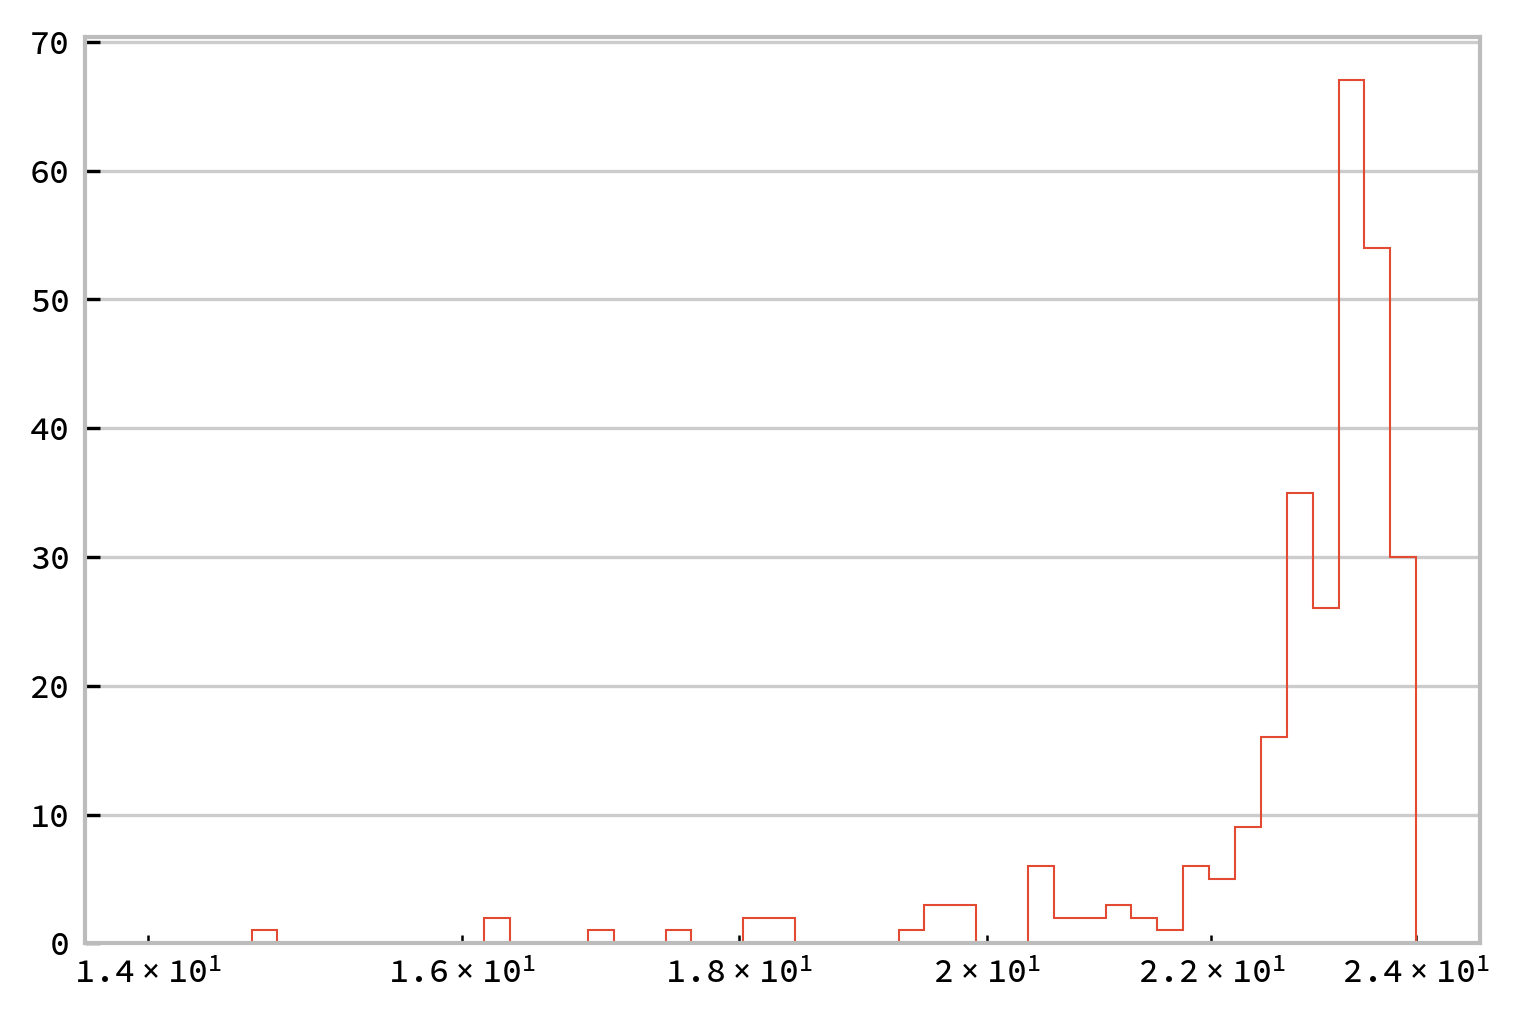

In [49]:
import numpy as np
f, ax = plt.subplots(1,1, dpi=300)
ax.hist(data['minutes']/60, bins=np.logspace(np.log10(14),np.log10(24), 50), histtype="step")
ax.set_xscale("log")

In [35]:
data['datetime'] = pandas.to_datetime(data[' Date '], format="%d %m %y")

AttributeError: module 'pandas.plotting' has no attribute 'DateFormatter'

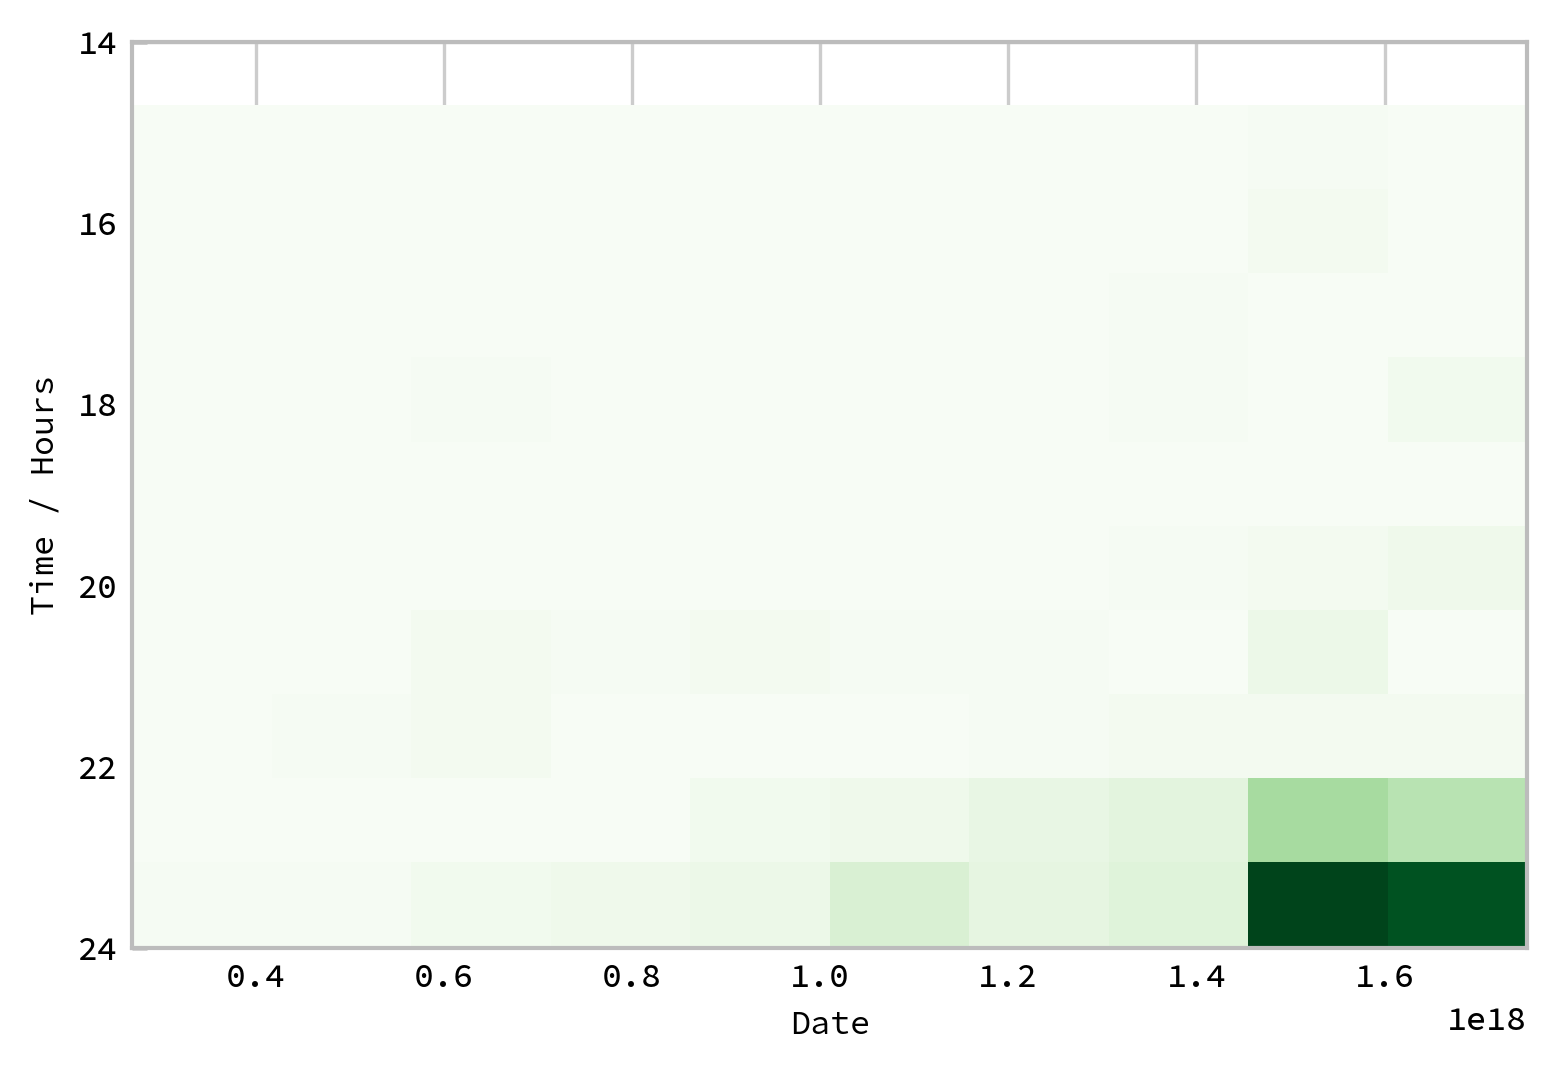

In [45]:
f, ax = plt.subplots(1,1, dpi=300)
ax.hist2d(data['datetime'], data['minutes']/60, cmap="Greens")
ax.set_ylim(24,14)
ax.set_ylabel("Time / Hours")
ax.set_xlabel("Date")
ax.xaxis(pandas.plotting.DateFormatter("%Y"))